# UK Net Zero

#### Introduction

#### What are emissions? [^1], [^2], [^3]
Emissions refer to the the pollutans humans release in the atmosphere through their activities. These range from greenhouse gases (such as CO2, HFC or methane), air pollutants (CO, black smoke or benzene), heavy metals (arsenic, mercury or lead) or particulate matter (PM10, PM2.5, PM1 or PM0.1).

Carbon is usually the main reference to emissions in the media. That is mainly because 5 million metric tons of carbon produced by humans remains in the atmosphere each year. This raises the global average of CO2 by 2.3 part per million every year. This means that, since 1750, humans have increased the amount of CO2 in the atmosphere by 50%. 

The Kyoto Protocol, which entered into force in 2005, establishes the [UN Framework Convention on Climate Change](https://unfccc.int/process-and-meetings/the-convention/what-is-the-united-nations-framework-convention-on-climate-change) for industrialised economies to limit and reduce their greenhouse gases emissions. 


#### What is net zero? Net vs gross zero [^3]

Although a broad term, this has been highly used in the public space over the past few years and more so recently. It refers to the reduction of greenhouse gas emissions combined with the removal of such gases from the atmosphere.

This is in contrast to gross zero, which refers to reducing all greenhouse gas emissions to zero. Net zero recognises this is a potentially unrealistic goal, as some industries will continue to emit such gases.

To allow net zero to be a viable route, the gases emitted by more polluting industries will need to be offset, through means such as natural carbon sinks or as artificial carbon sinks. As research into these artifical technologies is ongoing, the focus is on using natural carbon sinks to capture these gases, using, for e.g., oceans and forests.

When the carbon produced is cancelled out by the carbon removed, the UK will be a net zero emitter, which becomes easier as emissions lower further down.

#### How are emissions data collected, by whom and how often?



[^1]: https://www.climate.gov/news-features/climate-qa/are-humans-causing-or-contributing-global-warming#:~:text=A%20net%205%20billion%20metric,atmosphere%20by%20nearly%2050%20percent.
[^2]: https://naei.beis.gov.uk/data/data-selector?view=pms
[^3]: https://www.instituteforgovernment.org.uk/explainers/net-zero-target

---
The ONS is publishing different datasets in relation to environmental data, at different timescales. The following work is based on the dataset on [Atmospheric emissions: greenhouse gases by industry and gas
](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom) as published on the 3rd of June 2021.

This is looking at the aggregated CO2e emissions for the years 1990 through to 2019, which illustrates the amount of CO2e has been reducing for that period.

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
df = pd.read_excel("data_sources/atmos_emis_ghg.xlsx", sheet_name="GHG total")

In [253]:
df

,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Back to contents
0,UK resident basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass of air emissions per annum in thousand to...
2,NaN,NaN,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019
3,A,NaN,"Agriculture, forestry and fishing",54667.9,54356.7,53949.2,53149.4,54274.5,54179.8,55061.4,...,46448.9,46473.7,46329.2,45966.7,48025.5,48002.3,48165.6,48767.4,48200.5,48585.6
4,B,NaN,Mining and quarrying,46561.7,47082.0,47618.5,47244.1,42960.3,44199.1,45485.6,...,26790.9,24307.8,22873.8,21461.9,21464.0,22738.1,21603.0,21955.5,21801.2,21785.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1. Greenhouse gases under the Kyoto Protocol: ...,NaN,NaN,http://naei.beis.gov.uk/overview/ghg-overview,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,All figures are reported to 1 decimal place. T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
x = df.copy(deep=True).iloc[[2, 25]]

In [255]:
x.reset_index()

,index,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Back to contents
0,2,NaN,NaN,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019
1,25,NaN,NaN,Total greenhouse gas emissions,830696.6,840936.5,821212.8,803452.2,795337.4,791079.6,...,681306.1,640004.8,653487.3,641211.1,608318.8,598369.3,575976.8,563397.2,568570.5,551523


In [256]:
x.drop(columns=x.columns[:4], inplace=True)

In [257]:
transposed = x.transpose(copy=True)

In [258]:
transposed.rename(columns={2: "Year", 25: "CO2e"}, inplace=True)

In [259]:
transposed.reset_index(drop=True)

,Year,CO2e
0,1991.0,840936.5
1,1992.0,821212.8
2,1993.0,803452.2
3,1994.0,795337.4
4,1995.0,791079.6
5,1996.0,818825.1
6,1997.0,794326.7
7,1998.0,795544.8
8,1999.0,765962.2
9,2000.0,768101.8


[Text(0, 0, '1991.0'),
 Text(1, 0, '1992.0'),
 Text(2, 0, '1993.0'),
 Text(3, 0, '1994.0'),
 Text(4, 0, '1995.0'),
 Text(5, 0, '1996.0'),
 Text(6, 0, '1997.0'),
 Text(7, 0, '1998.0'),
 Text(8, 0, '1999.0'),
 Text(9, 0, '2000.0'),
 Text(10, 0, '2001.0'),
 Text(11, 0, '2002.0'),
 Text(12, 0, '2003.0'),
 Text(13, 0, '2004.0'),
 Text(14, 0, '2005.0'),
 Text(15, 0, '2006.0'),
 Text(16, 0, '2007.0'),
 Text(17, 0, '2008.0'),
 Text(18, 0, '2009.0'),
 Text(19, 0, '2010.0'),
 Text(20, 0, '2011.0'),
 Text(21, 0, '2012.0'),
 Text(22, 0, '2013.0'),
 Text(23, 0, '2014.0'),
 Text(24, 0, '2015.0'),
 Text(25, 0, '2016.0'),
 Text(26, 0, '2017.0'),
 Text(27, 0, '2018.0'),
 Text(28, 0, '2019')]

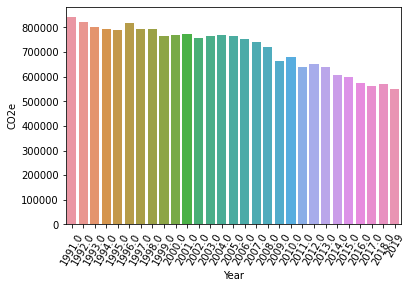

In [262]:
graph = sns.barplot(
    x="Year",
    y="CO2e",
    data=transposed
)

graph.set_xticklabels(graph.get_xticklabels(), rotation=60)

-note to self: Try to look at the data per industry per year and find biggest differences. Can those be correlated to something?